# **Data Collection**

##**Importing Libraries**

In [ ]:
pip install scikit-learn-extra

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans,DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statistics as state
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

## **Importing Dataset**

In [ ]:
data = pd.read_csv('/content/thyroid.csv')
data.head()

,Age,sex,thyroxine,queryonthyroxine,onantithyroidmedication,sick,pregnant,thyroidsurgery,I131treatment,queryhypothyroid,...,TT4measured,T4,T4Umeasured,T4U,FTImeasured,FTI,TBGmeasured,TBG,referral source,Result
0,12,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,20,M,f,f,f,f,f,f,f,f,...,t,102.0,f,0.00,f,0.0,f,NaN,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,0.00,f,0.0,f,NaN,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


## **Exploratory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3770 non-null   int64  
 1   sex                      3620 non-null   object 
 2   thyroxine                3770 non-null   object 
 3   queryonthyroxine         3770 non-null   object 
 4   onantithyroidmedication  3770 non-null   object 
 5   sick                     3770 non-null   object 
 6   pregnant                 3770 non-null   object 
 7   thyroidsurgery           3770 non-null   object 
 8   I131treatment            3770 non-null   object 
 9   queryhypothyroid         3770 non-null   object 
 10  queryhyperthyroid        3770 non-null   object 
 11  lithium                  3770 non-null   object 
 12  goitre                   3770 non-null   object 
 13  tumor                    3770 non-null   object 
 14  hypopituitary           

In [ ]:
# shape of the dataset
data.shape

(3770, 30)

In [ ]:
# size of the dataset
data.size

113100

In [ ]:
# Viewing the dataset Columns
data.describe()

,Age,TSH,T3,T4,T4U,FTI,TBG
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,0.0
mean,51.724934,4.591025,1.603008,101.678462,0.892921,99.176844,NaN
std,20.097915,23.345886,1.097207,43.192637,0.354295,45.851205,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.250000,NaN
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000,NaN
75%,67.000000,2.475000,2.200000,123.000000,1.070000,121.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [ ]:
# Checking for the data types
data.dtypes

Age                          int64
sex                         object
thyroxine                   object
queryonthyroxine            object
onantithyroidmedication     object
sick                        object
pregnant                    object
thyroidsurgery              object
I131treatment               object
queryhypothyroid            object
queryhyperthyroid           object
lithium                     object
goitre                      object
tumor                       object
hypopituitary               object
psych                       object
TSHmeasured                 object
TSH                        float64
T3measured                  object
T3                         float64
TT4measured                 object
T4                         float64
T4Umeasured                 object
T4U                        float64
FTImeasured                 object
FTI                        float64
TBGmeasured                 object
TBG                        float64
referral source     

In [ ]:
data.columns

Index(['Age', 'sex', 'thyroxine', 'queryonthyroxine',
       'onantithyroidmedication', 'sick', 'pregnant', 'thyroidsurgery',
       'I131treatment', 'queryhypothyroid', 'queryhyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSHmeasured', 'TSH',
       'T3measured', 'T3', 'TT4measured', 'T4', 'T4Umeasured', 'T4U',
       'FTImeasured', 'FTI', 'TBGmeasured', 'TBG', 'referral source',
       'Result'],
      dtype='object')

# **Data Preprocessing**

## **Unique Value**

In [ ]:
# Create an empty list to store unique values
unique_values_list = []

# Iterate through each column in the dataset
for col in data.columns:
    # Get unique values for the current column
    unique_values = pd.unique(data[col])

    # Append the column name and its unique values to the list
    unique_values_list.append({'Column Name': col, 'Unique Values': unique_values})

# Create a DataFrame from the list of dictionaries
unique_values_df = pd.DataFrame(unique_values_list)

# Display the DataFrame
unique_values_df

,Column Name,Unique Values
0,Age,"[12, 20, 46, 70, 18, 59, 80, 66, 68, 84, 67, 7..."
1,sex,"[F, M, nan]"
2,thyroxine,"[f, t]"
3,queryonthyroxine,"[f, t]"
4,onantithyroidmedication,"[f, t]"
5,sick,"[f, t]"
6,pregnant,"[f, t]"
7,thyroidsurgery,"[f, t]"
8,I131treatment,"[f, t]"
9,queryhypothyroid,"[f, t]"


## **Check Missing Values**

In [ ]:
data.isnull().sum()

Age                           0
sex                         150
thyroxine                     0
queryonthyroxine              0
onantithyroidmedication       0
sick                          0
pregnant                      0
thyroidsurgery                0
I131treatment                 0
queryhypothyroid              0
queryhyperthyroid             0
lithium                       0
goitre                        0
tumor                         0
hypopituitary                 0
psych                         0
TSHmeasured                   0
TSH                           0
T3measured                    0
T3                            0
TT4measured                   0
T4                            0
T4Umeasured                   0
T4U                           0
FTImeasured                   0
FTI                           0
TBGmeasured                   0
TBG                        3770
referral source               0
Result                        0
dtype: int64

In [ ]:
## Let's drop some unnecessary columns
data=data.drop(['thyroxine', 'queryonthyroxine','onantithyroidmedication','I131treatment',
                'queryhypothyroid', 'queryhyperthyroid', 'lithium', 'hypopituitary', 'psych',
                'TSHmeasured','T3measured', 'TT4measured',  'T4Umeasured','FTImeasured','TBG',
                'TBGmeasured',  'referral source'],axis=1)

In [ ]:
data

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Result
0,12,F,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,P
1,20,M,f,f,f,f,f,4.10,2.0,102.0,0.00,0.0,P
2,46,M,f,f,f,f,f,0.98,0.0,109.0,0.91,120.0,P
3,70,F,f,f,f,f,f,0.16,1.9,175.0,0.00,0.0,P
4,70,F,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,30,F,f,f,f,f,t,0.00,0.0,0.0,0.00,0.0,P
3766,68,F,f,f,f,f,f,1.00,2.1,124.0,1.08,114.0,P
3767,74,F,f,f,f,f,f,5.10,1.8,112.0,1.07,105.0,P
3768,72,M,f,f,f,f,f,0.70,2.0,82.0,0.94,87.0,P


## **Imputation method for categorical columns**

In [ ]:
most_frequent_sex = data['sex'].mode()[0]
data['sex'].fillna(most_frequent_sex, inplace=True)

In [ ]:
data.isnull().sum()

Age               0
sex               0
sick              0
pregnant          0
thyroidsurgery    0
goitre            0
tumor             0
TSH               0
T3                0
T4                0
T4U               0
FTI               0
Result            0
dtype: int64

## **Duplicates**

In [ ]:
# dropping duplicates
data.duplicated().sum()

86

In [ ]:
data = data.drop_duplicates(keep=False)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(3639, 13)

## **Standarization**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lblEn=LabelEncoder()
columns=['sex',	'sick',	'pregnant', 'thyroidsurgery',	'goitre',	'tumor','Result']
for i in columns:
  data[i]=lblEn.fit_transform(data[i])

In [ ]:
X=data['Result']
data=data.drop(['Result'],axis=1)

In [ ]:
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0


In [ ]:
# Create a StandardScaler object
scaler = MinMaxScaler()
# Fit the scaler to your data to compute mean and standard deviation
col=data.columns
scaler.fit(data[col])
data1=pd.DataFrame(columns=data.columns)
data1[col] = scaler.transform(data[col])

In [ ]:
data1.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI
0,0.024229,0.0,0.0,0.0,0.0,0.0,0.0,0.002453,0.235849,0.290698,0.491379,0.275949
1,0.041850,1.0,0.0,0.0,0.0,0.0,0.0,0.007736,0.188679,0.237209,0.000000,0.000000
2,0.099119,1.0,0.0,0.0,0.0,0.0,0.0,0.001849,0.000000,0.253488,0.392241,0.303797
3,0.151982,0.0,0.0,0.0,0.0,0.0,0.0,0.000302,0.179245,0.406977,0.000000,0.000000
4,0.151982,0.0,0.0,0.0,0.0,0.0,0.0,0.001358,0.113208,0.141860,0.375000,0.177215


In [ ]:
# Perform t-SNE to reduce the high-dimensional data to 2D
tsne = TSNE(n_components=2, random_state=42)
# d=data.drop['Cluster']
embedded_data = tsne.fit_transform(data1[['TSH','T3','T4','T4U','FTI']])

# **Clustering Algorithm**

## **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

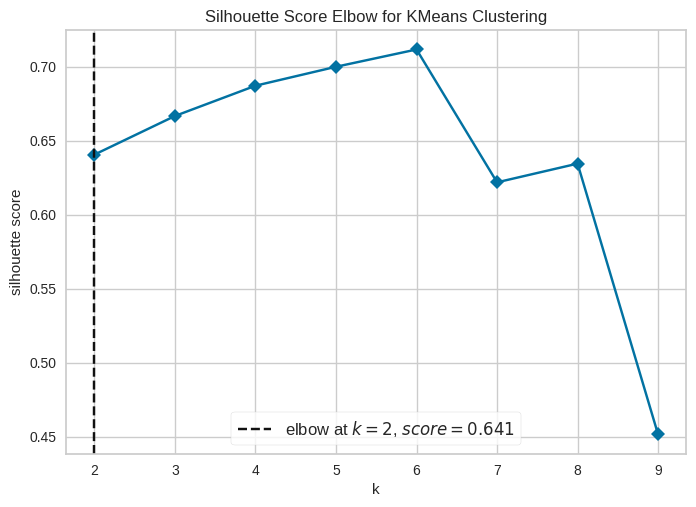

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(data1)
visualizer.poof()

In [ ]:
km = KMeans(n_clusters=2,random_state=42)
y_predicted = km.fit_predict(data1)
data['Cluster']=y_predicted
data['Cluster'] = data['Cluster'].apply(lambda x: 1 if x == 0 else 0 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids=km.cluster_centers_
centroids

array([[ 1.12594659e-01, -6.71684930e-15,  3.82622559e-02,
         2.11239538e-02,  1.75368673e-02,  8.76843364e-03,
         3.46751694e-02,  1.00180708e-02,  1.57491145e-01,
         2.53510154e-01,  4.10368192e-01,  2.62046708e-01],
       [ 1.11861136e-01,  1.00000000e+00,  4.15929204e-02,
        -1.56125113e-16,  7.96460177e-03,  1.06194690e-02,
         7.96460177e-03,  6.65125230e-03,  1.54516614e-01,
         2.25707553e-01,  3.72120079e-01,  2.55512490e-01]])

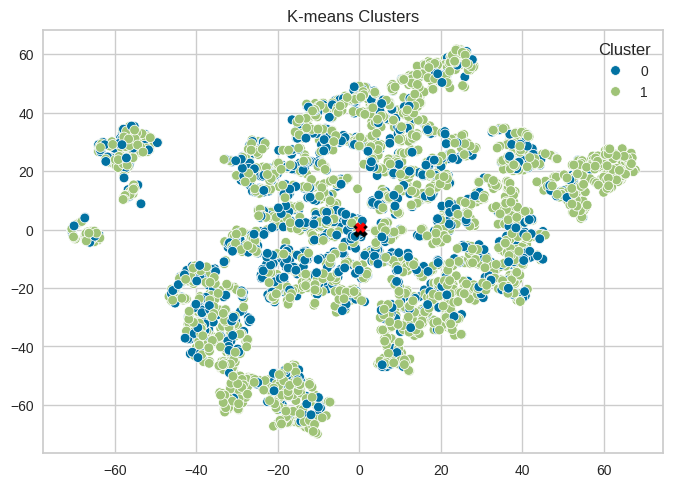

In [ ]:
# Create a scatter plot of the embedded data points, colored by cluster labels
sns.scatterplot(x=embedded_data[:, 0], y=embedded_data[:, 1], hue=data['Cluster'])
plt.scatter(centroids[0, 0], centroids[0, 1], marker='X', s=100, c='black')
plt.scatter(centroids[1, 0], centroids[1, 1], marker='X', s=50, c='red')
plt.title("K-means Clusters")
plt.show()

In [ ]:
data['Cluster'].value_counts()

Cluster
1    2509
0    1130
Name: count, dtype: int64

In [ ]:
data.to_csv('Kmeans.csv')
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,1
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1


## **K-medoids**

In [ ]:
data=data.drop(['Cluster'],axis=1)
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0


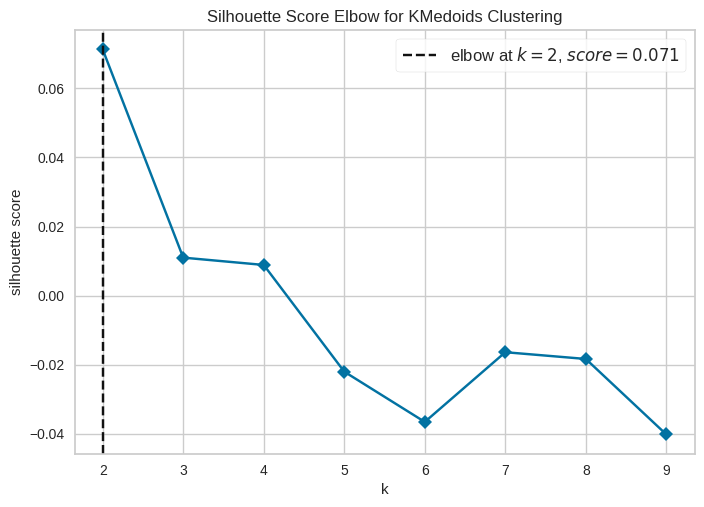

<Axes: title={'center': 'Silhouette Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMedoids(random_state=0)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)
visualizer.fit(data1)
visualizer.poof()

In [ ]:
km = KMedoids(n_clusters=2,random_state=42)
y_predicted = km.fit_predict(data1)
data['Cluster']=y_predicted
# data['Cluster'] = data['Cluster'].apply(lambda x: 1 if x == 0 else 0 )

In [ ]:
centroids=km.cluster_centers_
centroids

array([[1.03524229e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.45283019e-03,
        1.03773585e-01, 1.88372093e-01, 3.70689655e-01, 2.40506329e-01],
       [1.07929515e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.77358491e-04,
        1.88679245e-01, 2.81395349e-01, 4.48275862e-01, 2.93670886e-01]])

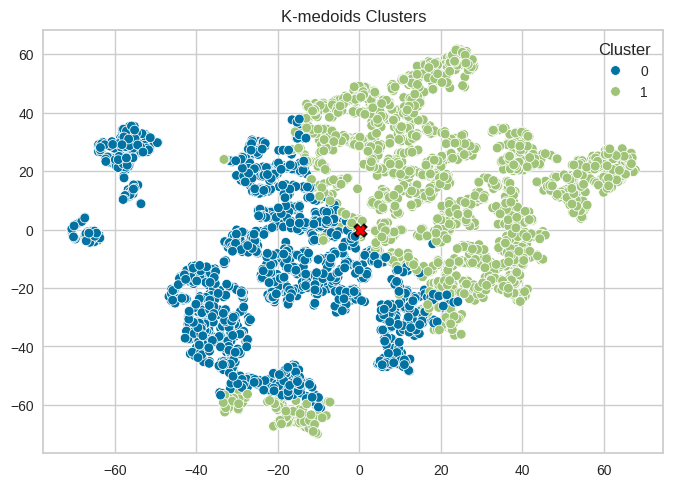

In [ ]:
# Create a scatter plot of the embedded data points, colored by cluster labels
sns.scatterplot(x=embedded_data[:, 0], y=embedded_data[:, 1], hue=data['Cluster'])
plt.scatter(centroids[0, 0], centroids[0, 1], marker='X', s=100, c='black')
plt.scatter(centroids[1, 0], centroids[1, 1], marker='X', s=50, c='red')
plt.title("K-medoids Clusters")
plt.show()

In [ ]:
data['Cluster'].value_counts()

Cluster
1    1970
0    1669
Name: count, dtype: int64

In [ ]:
data["Cluster"] = y_predicted
data.head(10)

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,0
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0
5,18,0,0,0,0,0,0,0.03,0.0,183.0,1.30,141.0,1
6,59,0,0,0,0,0,0,0.00,0.0,72.0,0.92,78.0,0
7,80,0,0,0,0,0,0,2.20,0.6,80.0,0.70,115.0,0
8,66,0,0,0,0,0,1,0.60,2.2,123.0,0.93,132.0,1
9,68,1,0,0,0,0,0,2.40,1.6,83.0,0.89,93.0,0


In [ ]:
data.to_csv('Kmedoids.csv')
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,0
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,0


## **DBSCAN**

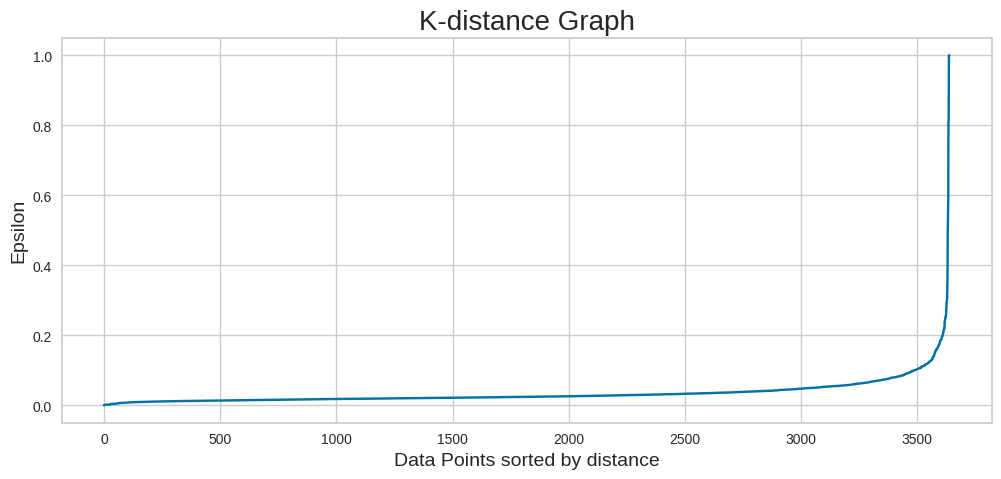

In [ ]:
neigh = NearestNeighbors(n_neighbors=50)
nbrs = neigh.fit(data1)
distances, indices = nbrs.kneighbors(data1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(12,5))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
# Perform t-SNE to reduce the high-dimensional data to 2D
tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(data1)

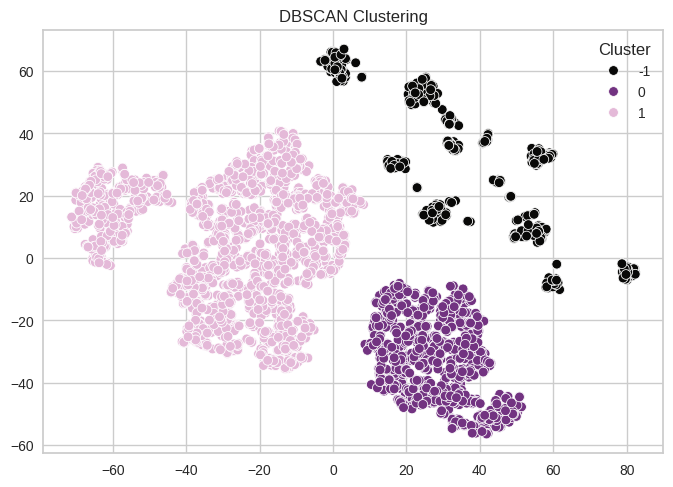

In [ ]:
Cluster= DBSCAN(eps =0.2, min_samples = 500).fit(data1)
data['Cluster']=Cluster.labels_
data['Cluster'] = data['Cluster'].apply(lambda x: 1 if x == 0 else 0 if x == 1 else -1)
sns.scatterplot(x=embedded_data[:, 0], y=embedded_data[:, 1], hue=data['Cluster'], palette=['#090908','#723381','#E4B9D8'])
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
data['Cluster'].value_counts()

Cluster
 1    1989
 0     959
-1     691
Name: count, dtype: int64

In [ ]:
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.300,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.100,2.0,102.0,0.00,0.0,-1
2,46,1,0,0,0,0,0,0.980,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.160,1.9,175.0,0.00,0.0,-1
4,70,0,0,0,0,0,0,0.720,1.2,61.0,0.87,70.0,1
5,18,0,0,0,0,0,0,0.030,0.0,183.0,1.30,141.0,1
6,59,0,0,0,0,0,0,0.000,0.0,72.0,0.92,78.0,1
7,80,0,0,0,0,0,0,2.200,0.6,80.0,0.70,115.0,1
8,66,0,0,0,0,0,1,0.600,2.2,123.0,0.93,132.0,-1
9,68,1,0,0,0,0,0,2.400,1.6,83.0,0.89,93.0,0


In [ ]:
Outlier = pd.DataFrame(columns=data.columns)
outlier_rows = []
outlier_rows = data[data['Cluster'] == -1].copy()
Outlier = outlier_rows.reset_index(drop=True)
Outlier.to_csv('DBSCAN(outlier).csv')
Outlier.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,20,1,0,0,0,0,0,4.100,2.0,102.0,0.00,0.0,-1
1,70,0,0,0,0,0,0,0.160,1.9,175.0,0.00,0.0,-1
2,66,0,0,0,0,0,1,0.600,2.2,123.0,0.93,132.0,-1
3,84,0,0,0,0,0,1,1.100,2.2,115.0,0.95,121.0,-1
4,71,0,1,0,0,0,0,0.030,3.8,171.0,1.13,151.0,-1
5,63,0,0,0,0,0,0,0.030,5.5,199.0,1.05,190.0,-1
6,25,0,0,0,0,0,0,0.300,3.1,129.0,0.00,0.0,-1
7,34,0,0,1,0,0,0,0.035,2.5,119.0,1.55,76.0,-1
8,25,0,0,0,0,0,1,1.100,0.0,101.0,1.07,94.0,-1
9,61,0,0,0,0,1,0,0.990,1.5,63.0,0.56,113.0,-1


In [ ]:
Cluster = pd.DataFrame(columns=data.columns)
cluster_rows = []
cluster_rows = data[data['Cluster'] !=-1].copy()
Cluster = cluster_rows.reset_index(drop=True)
Cluster.to_csv('DBSCAN(Cluster).csv')
Cluster.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.300,2.50,125.0,1.140,109.0,1
1,46,1,0,0,0,0,0,0.980,0.00,109.0,0.910,120.0,0
2,70,0,0,0,0,0,0,0.720,1.20,61.0,0.870,70.0,1
3,18,0,0,0,0,0,0,0.030,0.00,183.0,1.300,141.0,1
4,59,0,0,0,0,0,0,0.000,0.00,72.0,0.920,78.0,1
5,80,0,0,0,0,0,0,2.200,0.60,80.0,0.700,115.0,1
6,68,1,0,0,0,0,0,2.400,1.60,83.0,0.890,93.0,0
7,67,0,0,0,0,0,0,0.030,0.00,152.0,0.990,153.0,1
8,59,0,0,0,0,0,0,2.800,1.70,97.0,0.910,107.0,1
9,28,1,0,0,0,0,0,3.300,1.80,109.0,0.910,119.0,0


## **Agglomerative Hierarchical clustering**

In [ ]:
data=data.drop(['Cluster'],axis=1)
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0


In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


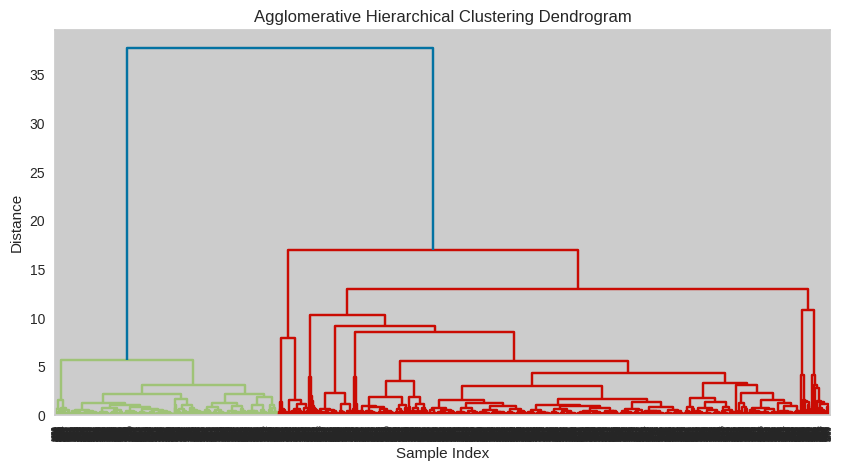

In [ ]:
# Perform agglomerative hierarchical clustering
linkage_matrix = linkage(data1, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Determine clusters
k = 2 # Change this to your chosen number of clusters
clusters = fcluster(linkage_matrix, k, criterion='maxclust')-1

# Add cluster labels to the original dataset
data['Cluster'] = clusters
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,1
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1


In [ ]:
data['Cluster'].value_counts()

Cluster
1    2586
0    1053
Name: count, dtype: int64

In [ ]:
data.to_csv('Hierarchical.csv')
data.head()

,Age,sex,sick,pregnant,thyroidsurgery,goitre,tumor,TSH,T3,T4,T4U,FTI,Cluster
0,12,0,0,0,0,0,0,1.30,2.5,125.0,1.14,109.0,1
1,20,1,0,0,0,0,0,4.10,2.0,102.0,0.00,0.0,0
2,46,1,0,0,0,0,0,0.98,0.0,109.0,0.91,120.0,0
3,70,0,0,0,0,0,0,0.16,1.9,175.0,0.00,0.0,1
4,70,0,0,0,0,0,0,0.72,1.2,61.0,0.87,70.0,1
